# PROJECT EV Population in the US

Our project, 'USA Electric Car Trends,' focuses on understanding and predicting the use of electric cars in the United States. We'll use machine learning to study how electric cars are distributed across the country. By looking at factors like where people live, the types of electric cars they use, and government incentives, we aim to give insights into how electric cars are growing in popularity. This research can help with future planning and decisions on electric cars in the USA.


Author 1: Kamel Lehmoudi, up202301437 <br>
Author 2: Moraless Philius, up202302762

## Library

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Preprocessing

In [326]:
df = pd.read_csv("Data/Electric_Vehicle_Population_Data.csv", delimiter=";")

# Data Analysis

In [327]:
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033004800
1,1C4RJYB61N,King,Bothell,WA,98011,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033021804
2,1C4RJYD61P,Yakima,Yakima,WA,98908,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,53077002900


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   VIN (1-10)                                         1999 non-null   object
 1   County                                             1999 non-null   object
 2   City                                               1999 non-null   object
 3   State                                              1999 non-null   object
 4   Postal Code                                        1999 non-null   int64 
 5   Model Year                                         1999 non-null   int64 
 6   Make                                               1999 non-null   object
 7   Model                                              1999 non-null   object
 8   Electric Vehicle Type                              1999 non-null   object
 9   Clean Alternative F

 While data analysis can involve numerous graphs to visualize the distribution of features in a dataset, it's important to note that the mere act of plotting graphs doesn't inherently assign significance to the analysis. However, these visualizations serve as valuable tools to observe and comprehend the distribution patterns of features within the dataset.

Exemple: Observation of the brand distribution across the vehicle registered in the data set:

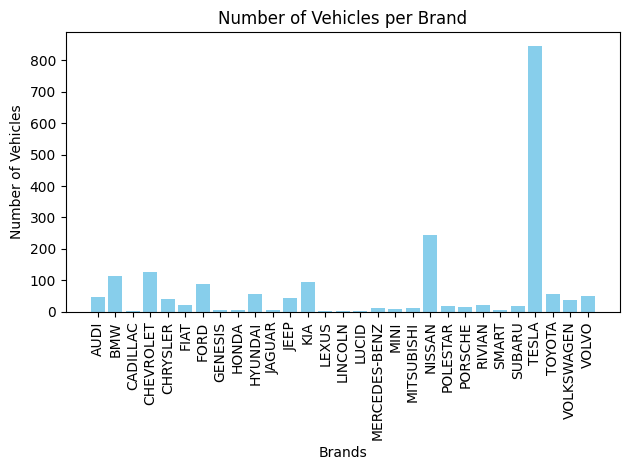

brand_counts [ 46 115   3 127  40  22  89   5   6  57   4  44  94   3   1   1  12   8
  13 243  19  14  20   5  19 847  56  37  49]


In [329]:

# Load the data using np.genfromtxt
data = np.genfromtxt('Data/Electric_Vehicle_Population_Data.csv', delimiter=';', dtype=str, skip_header=1)

# Extracting relevant columns
brand = data[:, 6]

# Extract the unique brands and their counts
unique_brands, brand_counts = np.unique(brand, return_counts=True)
# Plott
#
#re(figsize=(10, 6))
plt.bar(unique_brands, brand_counts, color='skyblue')
plt.xlabel('Brands')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles per Brand')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print("brand_counts",brand_counts)

# Splitting the data

In [330]:
# Split the data into training, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.25, random_state=42)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Save the datasets to CSV files
train_df.to_csv("Data/train_dataset.csv", index=False)
test_df.to_csv("Data/test_dataset.csv", index=False)
validation_df.to_csv("Data/validation_dataset.csv", index=False)

# Display the shapes of the datasets
print(f"shape of the training data set : {train_df.shape}")
print(f"shape of the test data set : {test_df.shape}")
print(f"Shape of the validation dataset: {validation_df.shape}")



shape of the training data set : (1499, 17)
shape of the test data set : (250, 17)
Shape of the validation dataset: (250, 17)



# Predictive Model for Electric Range:
 # Objective: 
 Build a model to predict the electric range of vehicles based on features like model year, brand, and electric vehicle type.



# 1ST MODEL : Linear Regression 
Let's see how well this model perform for predicting the range of a vehicle based on our data .

Mean Squared Error: 9285.137778198865


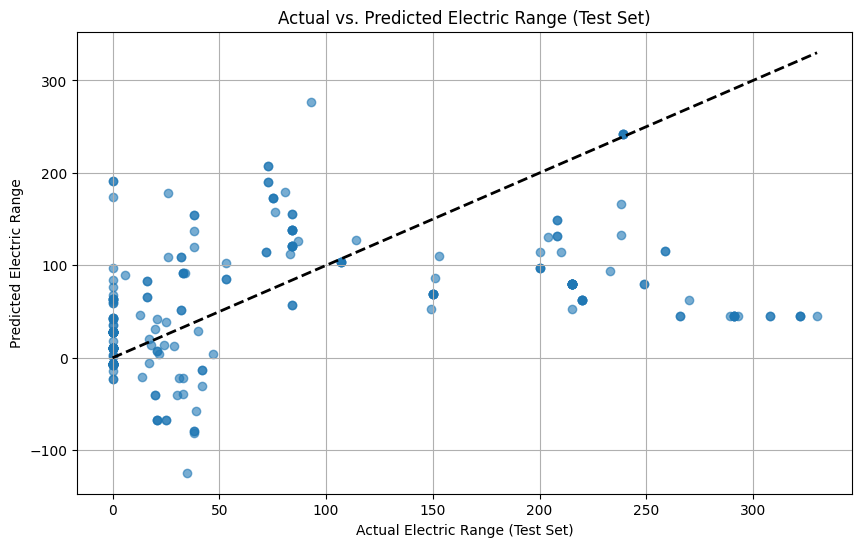

In [331]:
import numpy as np
#Normalise the data :
import csv
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# The data :

#train_df = training data
#test_df = test data
#validation_df = validation data

# Extracting relevant columns from the training dataset 
#X (training)
model_year = train_df.iloc[:, 5].values
brand = train_df.iloc[:, 6].values
vehicle_type = train_df.iloc[:, 8].values
#Y (taining)
electric_range = train_df.iloc[:, 10].values.astype(float)



# Encoding categorical variables: Brand and Vehicle Type
label_encoder_brand = LabelEncoder()
label_encoder_type = LabelEncoder()
brand_encoded = label_encoder_brand.fit_transform(brand)
type_encoded = label_encoder_type.fit_transform(vehicle_type)

# Combine extracted features into a feature matrix
features_encoded = np.column_stack((model_year, brand_encoded, type_encoded, electric_range))

# Splitting features and target variable
X = features_encoded[:, :-1].astype(float)
y = features_encoded[:, -1].astype(float)

#-------------------------------------------------------------------------------------------------------------------------------------------------
# Extract relevant columns from the test dataset 
#X (test)
model_year_test = test_df.iloc[:, 5].values
brand_test = test_df.iloc[:, 6].values
vehicle_type_test = test_df.iloc[:, 8].values
#Y (test)
electric_range_test = test_df.iloc[:, 10].values.astype(float)


# Encoding categorical variables for the test set using the same LabelEncoders
brand_encoded_test = label_encoder_brand.fit_transform(brand_test)
type_encoded_test = label_encoder_type.fit_transform(vehicle_type_test)

# Combine the extracted features into a feature matrix for the test set
features_encoded_test = np.column_stack((model_year_test, brand_encoded_test, type_encoded_test, electric_range_test))

# Splitting features and target variable for the test set
Xtest = features_encoded_test[:, :-1].astype(float)
ytest = features_encoded_test[:, -1].astype(float)
#----------------------------------------------------------------------------------------------------------------------------------
#preparing the validation 

# Extract relevant columns from the validation dataset 
#X (validation)
model_year_validation = validation_df.iloc[:, 5].values
brand_validation = validation_df.iloc[:, 6].values
vehicle_type_validation = validation_df.iloc[:, 8].values
#Y (validation)
electric_range_validation = validation_df.iloc[:, 10].values.astype(float)


# Encoding categorical variables for the test set using the same LabelEncoders
brand_encoded_validation = label_encoder_brand.fit_transform(brand_validation)
type_encoded_validation = label_encoder_type.fit_transform(vehicle_type_validation)

# Combine the extracted features into a feature matrix for the test set
features_encoded_validation = np.column_stack((model_year_validation, brand_encoded_validation, type_encoded_validation, electric_range_validation))

# Splitting features and target variable for the test set
Xvalidation = features_encoded_validation[:, :-1].astype(float)
yvalidation = features_encoded_validation[:, -1].astype(float)

#------------------------------------------------------------------------------------------------------------------------------------
# Preprocessing categorical columns using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [1, 2])  # Encodes brand and vehicle type
    ],
    remainder='passthrough'
)

# Linear Regression model in a pipeline with OneHotEncoder for categorical columns
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fitting the model
pipeline.fit(X, y)

# Predicting on the test set
y_pred_test = pipeline.predict(Xtest)

# Evaluating model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_pred_test, ytest)
print(f"Mean Squared Error: {mse}")

# Scatter plot for predicted vs. actual electric range in the test set
plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred_test, alpha=0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
plt.xlabel('Actual Electric Range (Test Set)')
plt.ylabel('Predicted Electric Range')
plt.title('Actual vs. Predicted Electric Range (Test Set)')
plt.grid()
plt.show()


03/01 : 
Approach: Discriminative models directly learn the decision boundary or conditional probability 
P(Y/X) without modeling the underlying probability distributions of individual classes.

Example Algorithms: Logistic Regression, Support Vector Machines (SVM), Decision Trees, Neural Networks.

Generative models might be more complex as they model the joint distribution, while discriminative models may be simpler and more computationally efficient as they focus only on the decision boundary.

# 2ND MODEL: 
# Decision trees for Electric Range prediction

Mean Squared Error: 3320.4890885374152


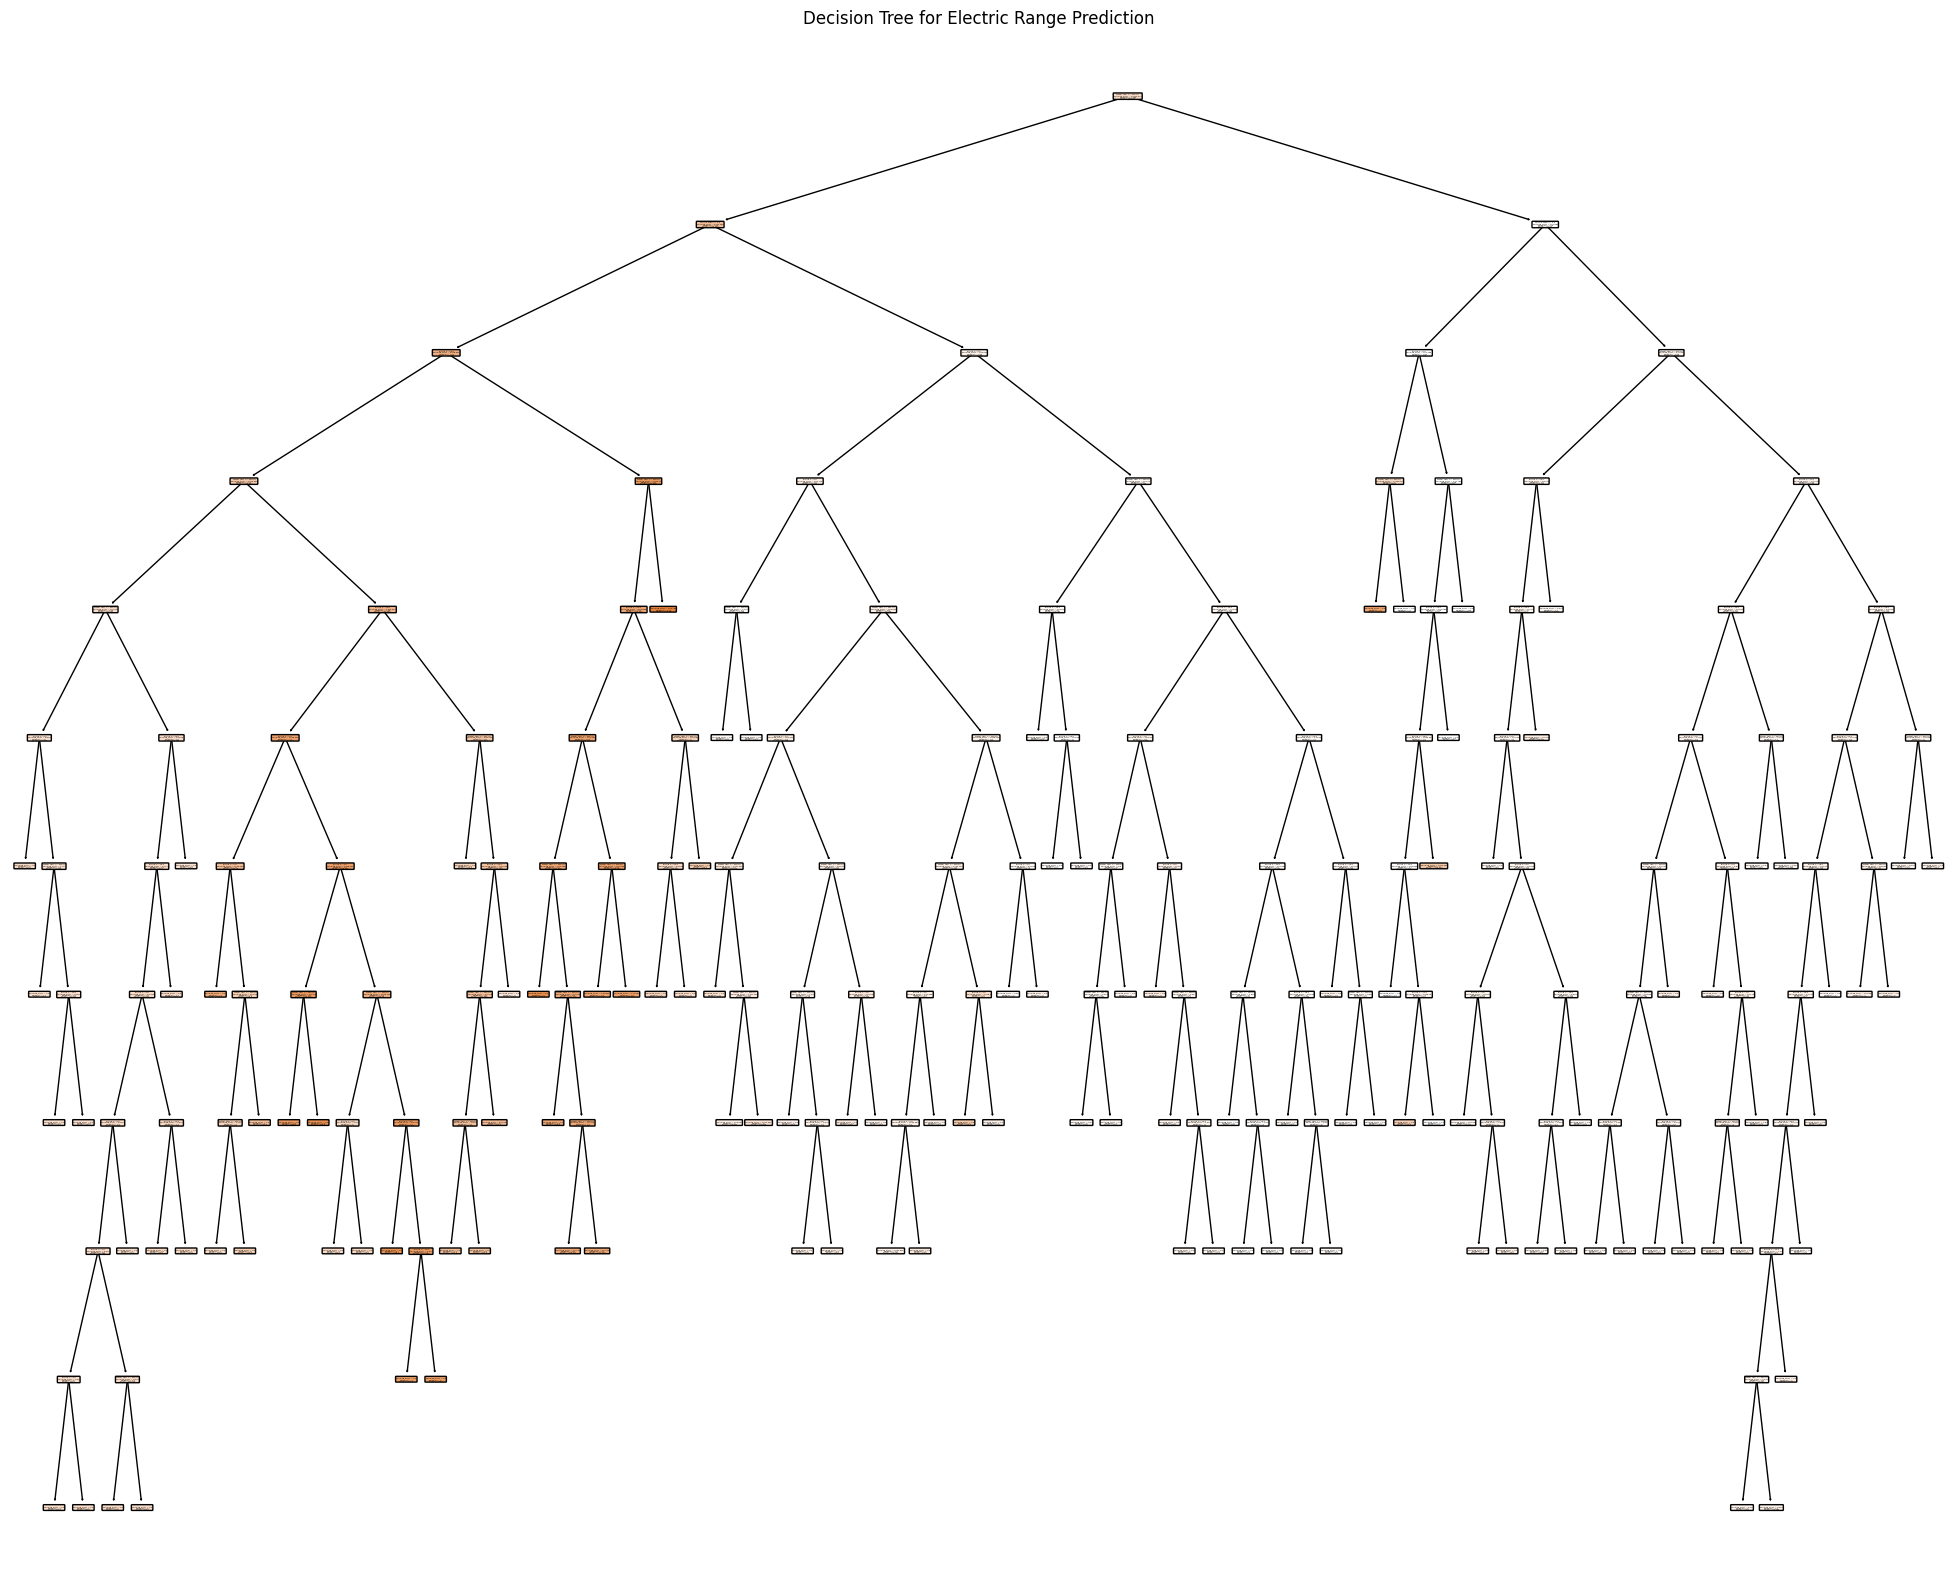

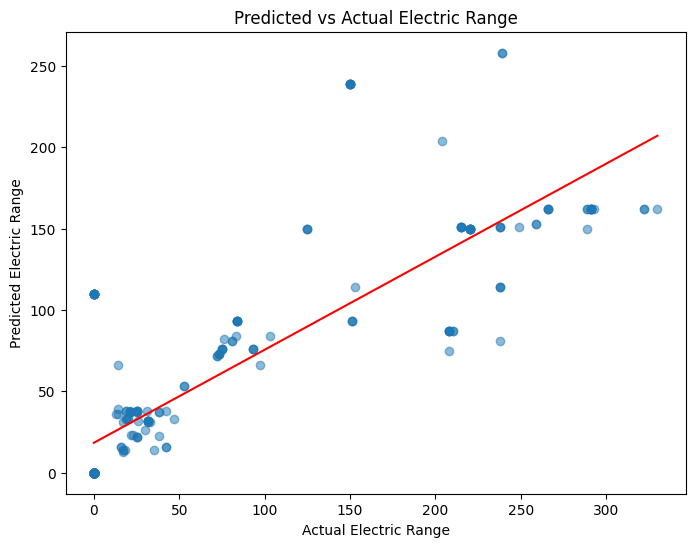

In [332]:
#decision trees : 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


# Build and train Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, y)

# Predict electric range for the validation
y_pred_validation = tree_reg.predict(Xvalidation)

# Evaluate the model
mse = mean_squared_error(yvalidation, y_pred_validation)
print(f"Mean Squared Error: {mse}")

# Plot the decision tree
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
plot_tree(tree_reg, feature_names=['Model Year', 'Brand', 'Vehicle Type'], filled=True, rounded=True)
plt.title('Decision Tree for Electric Range Prediction')
plt.show()

# Plot predicted vs actual values for electric range
plt.figure(figsize=(8, 6))
plt.scatter(yvalidation, y_pred_validation, alpha=0.5)
plt.plot(np.unique(yvalidation), np.poly1d(np.polyfit(yvalidation, y_pred_validation, 1))(np.unique(yvalidation)), color='red')  # Fit a linear curve
plt.xlabel('Actual Electric Range')
plt.ylabel('Predicted Electric Range')
plt.title('Predicted vs Actual Electric Range')
plt.show()

In [333]:
#Hyperparameter Tuning: Adjust the hyperparameters of the Decision Tree model. 
#For example, you can change the maximum depth of the tree, minimum samples per leaf, or the criterion for splitting.
#This might help in finding a set of hyperparameters that lead to lower mean squared error.

from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'max_depth': [None,1 ,2, 3, 5, 6, 7, 8, 9, 10, 15],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_tree_reg = DecisionTreeRegressor(**best_params, random_state=42)
best_tree_reg.fit(Xvalidation, yvalidation)

# Predict and evaluate the model
y_pred_best = best_tree_reg.predict(Xtest)
mse_best = mean_squared_error(ytest, y_pred_best)
print(f"Mean Squared Error (Best Model): {mse_best}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Mean Squared Error (Best Model): 3575.554358750908


The MSE doesn't getter better because the decision trees function "tree_reg = DecisionTreeRegressor(random_state=42)" already train the model with the best hyperparameter and have more range to find the optimal solution than us manually. So let's validate another way to minimize the MSE.

In [334]:
# Using Random Forest Regression, which combine multiple models to improve predictive performance.

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Fit the Random Forest model
rf_reg.fit(X, y)

# Predict on the validation set
y_pred_rf = rf_reg.predict(Xvalidation)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(yvalidation, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

# Predict on the test set
y_pred_rf_test = rf_reg.predict(Xtest)

# Evaluate the Random Forest model on the test set
mse_rf_test = mean_squared_error(ytest, y_pred_rf_test)
print(f"Mean Squared Error (Random Forest - Test): {mse_rf_test}")

Mean Squared Error (Random Forest): 2817.7672797131845
Mean Squared Error (Random Forest - Test): 2435.1724399121526


Test set MSE is lower than the validation set MSE, which might be a sign of overfitting to the validation data.

In [335]:
# Using Gradient Boosting Regression same Idea as Random Forest Regression

from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=42)

# Fit the Gradient Boosting model
gb_reg.fit(X, y)

# Predict on the test set
y_pred_gb = gb_reg.predict(Xvalidation)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(yvalidation, y_pred_gb)
print(f"Mean Squared Error (Gradient Boosting): {mse_gb}")

# Predict on the test set
y_pred_gb_test = gb_reg.predict(Xtest)

# Evaluate the Random Forest model on the test set
mse_rf_test = mean_squared_error(ytest, y_pred_gb_test)
print(f"Mean Squared Error (Gradient Boosting - Test): {mse_rf_test}")


Mean Squared Error (Gradient Boosting): 1596.608562530145
Mean Squared Error (Gradient Boosting - Test): 1877.9816123978396


 Gradient Boosting model may be performing reasonably well on the validation set but might not generalize as well to unseen data in the test set.

(Random Forest and Gradient Boosting) These two methods doesnt perform as well as cross validation, we can see a hight MSE resulting from these two method, so one thing we can do is an Error analysis 

Fold 1 (Train) MSE: 90.6860551303855
Fold 2 (Train) MSE: 731.8863266354373
Fold 3 (Train) MSE: 153.18248165680473
Fold 4 (Train) MSE: 545.3922902494331
Fold 5 (Train) MSE: 373.2928081632653


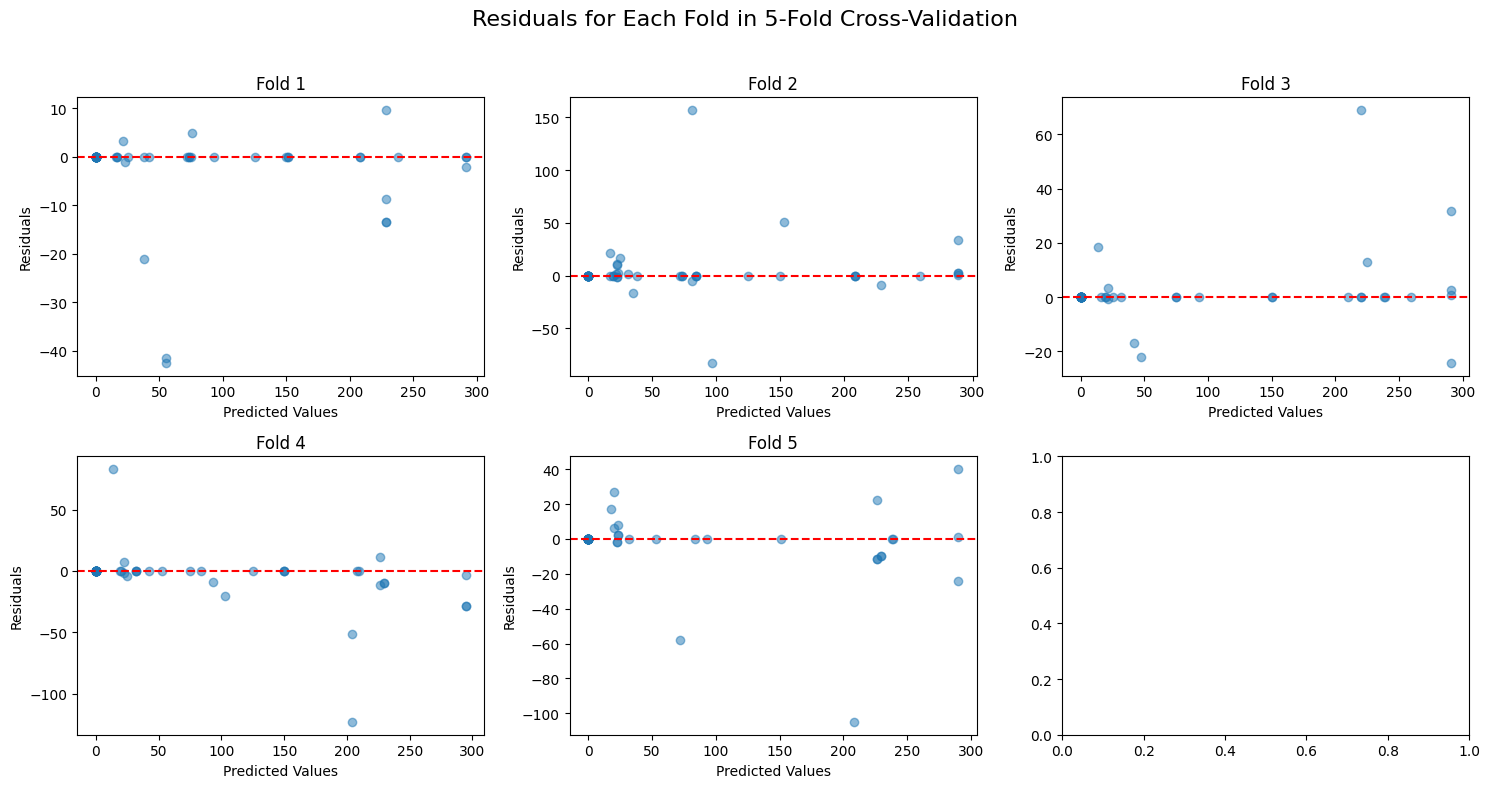

Fold 1 (Test) MSE: 72.49378500986195
Fold 2 (Test) MSE: 384.9274444444444
Fold 3 (Test) MSE: 121.79512360289283
Fold 4 (Test) MSE: 59.09891834319527
Fold 5 (Test) MSE: 153.8795964497041

Mean Squared Error (Cross-Validation): 378.8879923670652
Mean Squared Error (Cross-Validation - Test Set): 158.4389735700197


In [336]:
# Using cross validation to better estimate the model's performance. 
# It helps to ensure that the model's performance is not biased towards the specific training and testing split.
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an array to store MSE scores for each fold
mse_scores = []
mse_scores_test = []
# Create subplots for residuals
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Residuals for Each Fold in 5-Fold Cross-Validation', fontsize=16)

for i, (train_idx, val_idx) in enumerate(kf.split(Xvalidation, yvalidation), 1):
    # Split the data
    X_train_fold, X_validation_fold = Xvalidation[train_idx], Xvalidation[val_idx]
    y_train_fold, y_validation_fold = yvalidation[train_idx], yvalidation[val_idx]

    # Fit the model on the training fold
    tree_reg.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_pred_fold = tree_reg.predict(X_validation_fold)

    # Calculate residuals for the fold
    residuals_fold = y_validation_fold - y_pred_fold

    # Plot residuals
    row, col = divmod(i - 1, 3)
    axes[row, col].scatter(y_pred_fold, residuals_fold, alpha=0.5)
    axes[row, col].axhline(y=0, color='red', linestyle='--')
    axes[row, col].set_title(f'Fold {i}')
    axes[row, col].set_xlabel('Predicted Values')
    axes[row, col].set_ylabel('Residuals')

    # Calculate MSE for the fold
    mse_fold = np.mean(residuals_fold**2)
    mse_scores.append(mse_fold)

    # Print MSE for the fold
    print(f"Fold {i} (Train) MSE: {mse_fold}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
for i, (train_idx, test_idx) in enumerate(kf.split(Xtest, ytest), 1):
    # Split the data
    X_train_fold, X_test_fold = Xtest[train_idx], Xtest[test_idx]
    y_train_fold, y_test_fold = ytest[train_idx], ytest[test_idx]

    # Split the data for test evaluation
    X_test_fold, y_test_fold = Xtest, ytest  # Use the entire test set

     # Fit the model on the training fold
    tree_reg.fit(X_train_fold, y_train_fold)

    # Predict on the entire test set
    y_pred_test_fold = tree_reg.predict(X_test_fold)

    # Calculate residuals for the test fold
    residuals_test_fold = y_test_fold - y_pred_test_fold

    # Calculate MSE for the test fold
    mse_test_fold = np.mean(residuals_test_fold**2)
    mse_scores_test.append(mse_test_fold)

    # Print MSE for the test fold
    print(f"Fold {i} (Test) MSE: {mse_test_fold}")


# Calculate mean MSE across all folds
mean_mse = np.mean(mse_scores)
mean_mse_test = np.mean(mse_scores_test)
print(f"\nMean Squared Error (Cross-Validation): {mean_mse}")
print(f"Mean Squared Error (Cross-Validation - Test Set): {mean_mse_test}")

The MSE values for cross-validation vary significantly across folds, indicating some variability in model performance on different subsets of the data.

The MSE on the test set for each fold also shows variability, with Fold 4 having the lowest test MSE.

The mean MSE across all folds for cross-validation is 378.89, while the mean MSE on the test set is 158.44. This suggests that the model might be performing better on the test set compared to the individual folds in cross-validation.

The mean MSE on the test set is lower than the cross-validation mean MSE, which is a positive sign.

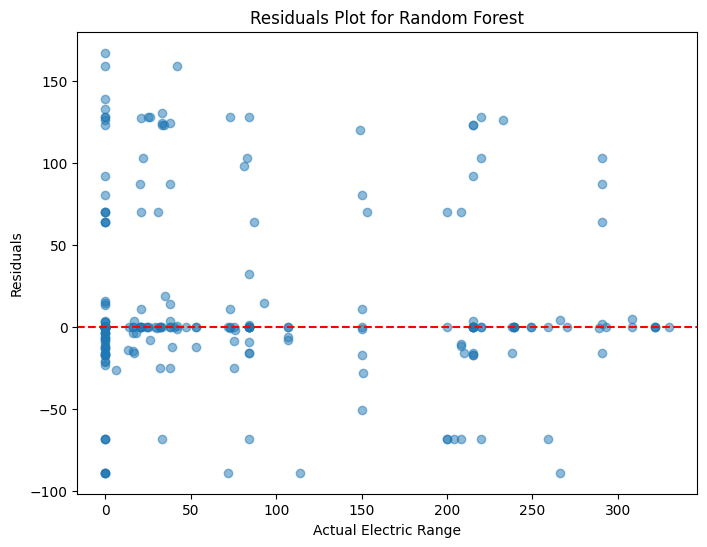

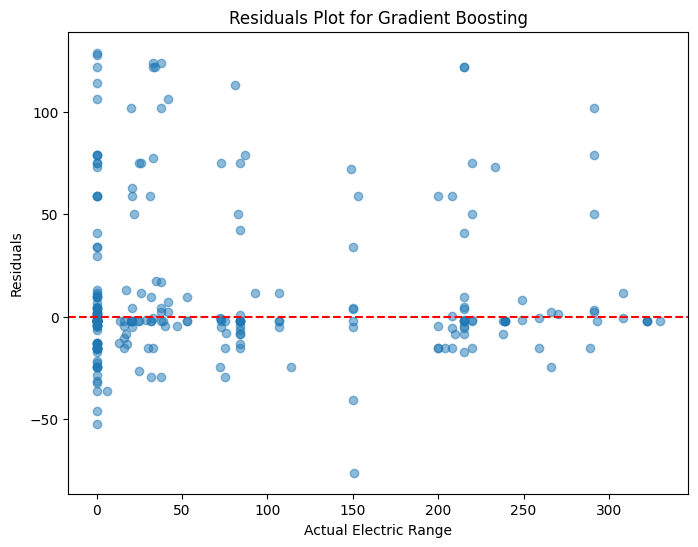

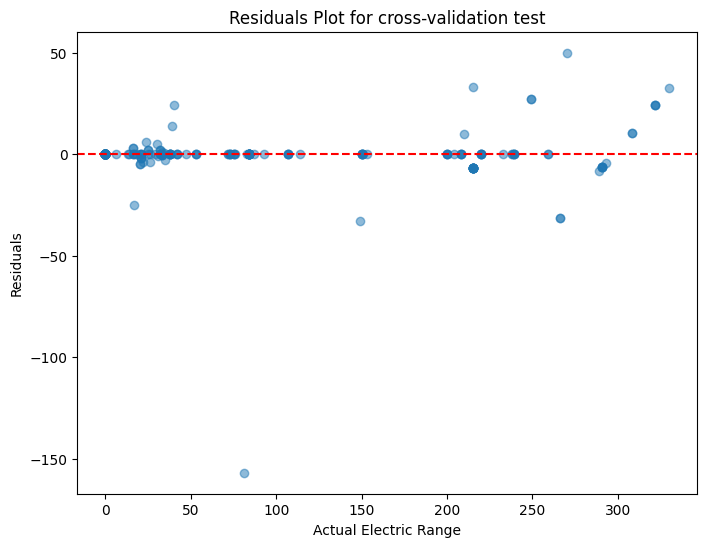

In [337]:
# Calculate residuals for Random Forest and Gradient Boosting
residuals_rf = yvalidation - y_pred_rf
residuals_gb = yvalidation - y_pred_gb
residuals_cv =  residuals_test_fold

# Plot residuals for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(ytest, residuals_rf, alpha=0.5)
plt.xlabel('Actual Electric Range')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Random Forest')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y=0
plt.show()

# Plot residuals for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(ytest, residuals_gb, alpha=0.5)
plt.xlabel('Actual Electric Range')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Gradient Boosting')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y=0
plt.show() 

# Plot residuals for cross-validation
plt.figure(figsize=(8, 6))
plt.scatter(ytest, residuals_cv, alpha=0.5)
plt.xlabel('Actual Electric Range')
plt.ylabel('Residuals')
plt.title('Residuals Plot for cross-validation test')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y=0
plt.show()

In this two graph we can take into account : 

-Spread of Residuals: Observe the spread of residuals around the horizontal line at y=0. A more concentrated spread indicates better model performance.
Here regardless of the methods used we can see a big residual for the range 225 (this range is very poorly predicted) by removing the row that correspond to this label in our dataset can improve the overall MSE, it let see that we might not normalize the data enought.

another thing we can look at is the Patterns in Residuals, we need to look for any patterns in residuals. If the residuals show a pattern (e.g., increasing/decreasing as the actual value increases), it indicates a systematic error.
Here we can se that as the range increase the residuals get more spread implying that we might be in presence of what we called a systematic error.

(reminder:A systematic error refers to a consistent deviation or bias in the measurements or predictions that occurs consistently in the same direction or manner across the dataset. Unlike random errors that are unpredictable and may cancel each other out, systematic errors affect the entire dataset in a consistent way.
for example: Instrument Calibration is a systematic error)

Here in our case this Systematic error may arise due to a consistent error in data collection, such as underreporting or overreporting certain values across the dataset.


# Customer Segmentation for Electric Vehicles:
# Objective:
 Segment electric vehicle customers based on demographic features to tailor marketing strategies and services.
we can use the model year,the range, type of vehicule,make (brand) 

## Naive Bayes 

In [338]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Training
top_brands = train_df['Make'].value_counts().head(5).index
temp_train = train_df[train_df['Make'].isin(top_brands)]
y_train = temp_train['Make']
X_train = temp_train[['Model Year', 'Electric Range']]

# Test
top_brands = test_df['Make'].value_counts().head(5).index
temp_test = test_df[test_df['Make'].isin(top_brands)]
y_test = temp_test['Make']
X_test = temp_test[['Model Year', 'Electric Range']]

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train.ravel())

y_pred_bayes = nb_classifier.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred_bayes)
print(f"Précision du classificateur Naive Bayes : {accuracy}")

Précision du classificateur Naive Bayes : 0.6808510638297872


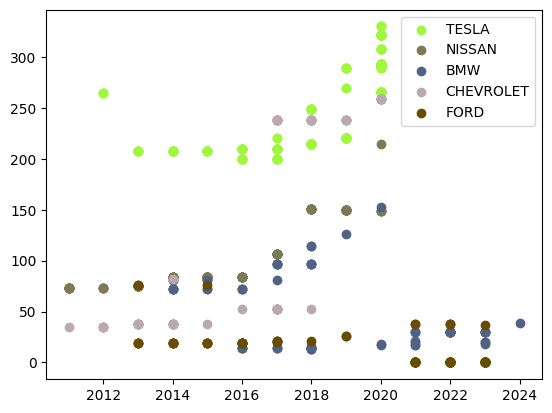

In [339]:
list_class = temp_train['Make'].unique()

fig, ax = plt.subplots()

colors = np.random.rand(len(list_class), 3)

# Plotting training data
for i, cls in enumerate(list_class):
    idxs = temp_train['Make'] == cls
    ax.scatter(temp_train.loc[idxs, 'Model Year'], temp_train.loc[idxs, 'Electric Range'], label=cls, color=colors[i])

ax.legend()
plt.show()

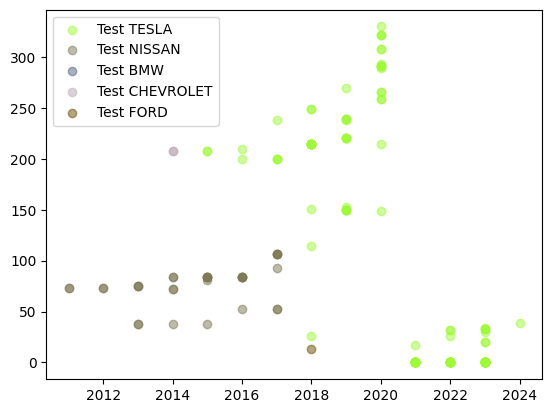

In [340]:
fig, ax = plt.subplots()
for i, cls in enumerate(list_class):
    idxs_test = y_pred_bayes == cls
    ax.scatter(temp_test.loc[idxs_test, 'Model Year'], temp_test.loc[idxs_test, 'Electric Range'], alpha=0.5, color=colors[i], label=f'Test {cls}')

ax.legend()
plt.show()

## Logistic Regression

In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer un modèle de régression logistique avec plus d'itérations
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=100)

# Entraîner le modèle avec les données normalisées
logistic_model.fit(X_train_scaled, y_train)

# Prédire les étiquettes pour l'ensemble de test normalisé
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Calculer la précision du modèle
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Précision du modèle de régression logistique : {accuracy_logistic}")

Précision du modèle de régression logistique : 0.6595744680851063


## Neural Network 

In [363]:
# NN à tester 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# Encoder les étiquettes de classe en entiers
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(y_train)

# Convertir les entiers en variables binaires (one hot encoding)
dummy_y = np_utils.to_categorical(encoded_Y)

# Définir le modèle de réseau de neurones
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(len(list_class), activation='softmax'))

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, dummy_y, epochs=150, batch_size=10, verbose=0)

# Évaluer le modèle
scores = model.evaluate(X_test, np_utils.to_categorical(encoder.transform(y_test)), verbose=0)
print(f"Précision du réseau de neurones : {scores[1]*100}")

ModuleNotFoundError: No module named 'keras.src.activations.activations'; 'keras.src.activations' is not a package

# SVM :

-Electric Vehicle Adoption Prediction:
Objective: Use historical data to predict the future adoption and growth of electric vehicles in different states or counties.

In [343]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 5 more used brands in USA
# Diviser les données en ensemble d'entraînement et ensemble de testncoder_brand.fit_transform(brand)
# Combine the extracted features into a feature matrix for the test set


# Normaliser les données, cela est souvent important pour les SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer le modèle SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Entraîner le modèle
model.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")


Précision du modèle : 0.7819148936170213


In [362]:
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Convert y to an integer array
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train).astype(int)
print("y_train: ",y_train)
print("y_train_encoded: ",y_train_encoded )
print("X_train_scaled: ",X_train_scaled)

y_train_str = y_train.to_string(index=False, header=False)
print("y_train_str: ", y_train_str)
# Plot decision boundary for training data
plot_decision_regions(X_train_scaled, y_y_trainclf=model, legend=2)

# Adding axes annotations for training data
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('SVM Decision Boundary for Training Data')

# Show the plot for training data
plt.show()

# Cnvert y_test to an integer array
#y_#test_encoded = label_encoder.transform(y_test)

# Plot decision boundary for testing data
##pl#ot_decision_regions(X_test_scaled, y_test_encoded, clf=model, legend=2)

# Adding axes annotations for testing data
#pl#t.xlabel('Model Year')
#pl#t.ylabel('Electric Range')
#pl#t.title('SVM Decision Boundary for Testing Data')

# Show the plot for testing data
#pl#t.show()

y_train:  1010        TESLA
1323       NISSAN
654         TESLA
182        NISSAN
1444          BMW
          ...    
1238       NISSAN
466         TESLA
121         TESLA
1294    CHEVROLET
860         TESLA
Name: Make, Length: 1068, dtype: object
y_train_encoded:  [4 3 4 ... 4 1 4]
X_train_scaled:  [[-1.31614733  0.93889488]
 [-0.67721762  0.01625155]
 [ 0.92010663 -0.96120227]
 ...
 [-0.35775277  1.31343326]
 [ 0.28117693  1.40478409]
 [ 1.23957148 -0.96120227]]
y_train_str:      TESLA
   NISSAN
    TESLA
   NISSAN
      BMW
   NISSAN
    TESLA
   NISSAN
    TESLA
    TESLA
    TESLA
CHEVROLET
    TESLA
    TESLA
CHEVROLET
      BMW
    TESLA
    TESLA
    TESLA
      BMW
CHEVROLET
   NISSAN
     FORD
      BMW
    TESLA
   NISSAN
   NISSAN
    TESLA
   NISSAN
    TESLA
CHEVROLET
    TESLA
    TESLA
      BMW
    TESLA
   NISSAN
    TESLA
    TESLA
    TESLA
CHEVROLET
    TESLA
    TESLA
    TESLA
    TESLA
    TESLA
CHEVROLET
   NISSAN
    TESLA
   NISSAN
    TESLA
    TESLA
    TES

TypeError: plot_decision_regions() got an unexpected keyword argument 'y_y_trainclf'

## Charging Station Placement Optimization

Objective: Predict the demand for electric vehicle charging stations in different locations based on factors such as city,range, Make, Model year, Electric Vehicle Type
